### 数据预处理部分处理了什么以及具体如何处理

数据预处理是机器学习流程中的重要步骤，旨在将原始数据转换为适合模型训练的格式。在您提到的案例中，数据预处理主要处理了以下几个方面，特别是针对连续性特征分布偏斜的问题，采取了具体措施。以下是详细的中文回答：

#### 1. **导入数据**
- **处理内容**：从 UCI 机器学习库中获取银行营销数据集（Bank Marketing Dataset）。
- **具体方法**：
  - 使用 Python 的 `ucimlrepo` 包中的 `fetch_ucirepo` 函数，通过 `fetch_ucirepo(id=222)` 直接在线获取数据。
  - 数据被分为特征数据（存储在 `X` 中）和目标变量（存储在 `y` 中，目标变量是“y”，表示客户是否订阅定期存款）。

#### 2. **检查连续性特征的分布**
- **处理内容**：分析连续性特征（如 `pdays` 表示上次联系后的天数，`previous` 表示之前联系次数）的分布情况。
- **具体方法**：
  - 使用 Seaborn 库的 `histplot` 函数绘制直方图，并保存为 PNG 文件，直观展示这些特征的分布。
  - 结果显示，这些特征的分布往往是偏斜的（例如右偏，大多数值较小，少数值较大），这可能会影响模型性能，因此需要进一步处理。

#### 3. **对数转换处理偏斜**
- **处理内容**：针对连续性特征的偏斜分布，应用对数转换来改善数据的分布。
- **具体方法**：
  - 如果特征值全部为正数，则使用 `np.log(X[col] + 1)` 进行对数转换，加 1 是为了处理可能存在的 0 值，避免对数计算出错。
  - 如果特征包含非正值（例如 `pdays` 中有 -1，表示之前未联系过），则跳过对数转换，确保数据有效性。
  - **效果**：对数转换能将右偏分布拉近正态分布，提升模型对这些特征的处理能力。

#### 4. **识别数值和类别特征**
- **处理内容**：区分数据集中的数值特征和类别特征，以便后续分别处理。
- **具体方法**：
  - 使用 Pandas 的 `select_dtypes` 方法，将数据类型为 `int64` 或 `float64` 的列识别为数值特征，数据类型为 `object` 的列识别为类别特征。

#### 5. **创建预处理管道**
- **处理内容**：对数值特征和类别特征分别应用不同的预处理方法。
- **具体方法**：
  - 使用 Scikit-learn 的 `ColumnTransformer` 创建预处理管道：
    - **数值特征**：
      - 使用 `StandardScaler` 进行标准化，将特征值转换为均值为 0、标准差为 1 的形式，去除量纲差异。
      - 这对基于距离的算法（如 SVM、KNN）尤为重要，能防止某些特征因量纲不同而过度影响模型。
    - **类别特征**：
      - 使用 `OneHotEncoder` 进行独热编码，将类别变量（如“yes”或“no”）转换为数值形式（例如二进制向量），适合模型输入。

#### 6. **应用预处理**
- **处理内容**：将预处理管道应用于特征数据 `X`。
- **具体方法**：
  - 通过管道生成处理后的特征矩阵 `X_processed`，包含标准化后的数值特征和独热编码后的类别特征。

#### 7. **目标变量编码**
- **处理内容**：将目标变量 `y` 从类别型转换为数值型。
- **具体方法**：
  - 将“yes”编码为 1，“no”编码为 0，便于模型训练和评估。

#### 8. **数据集拆分**
- **处理内容**：将数据集分为训练集和测试集。
- **具体方法**：
  - 使用 `train_test_split` 函数，按 80% 训练集和 20% 测试集的比例随机拆分。
  - 设置 `stratify=y`，确保训练集和测试集中目标变量（“yes”和“no”）的比例与原始数据一致，特别适用于类别不平衡的情况。
  - 设置 `random_state=42`，保证拆分结果可复现。

### 针对连续性特征偏斜的具体处理
您特别提到连续性特征的分布确实是偏斜的，这在数据集中很常见（如 `pdays` 和 `previous`）。以下是针对这一问题的具体处理细节：
- **问题**：这些特征往往右偏，大多数值较小，少数值较大，导致分布不均匀。
- **解决方法**：
  - **检查分布**：通过直方图确认偏斜程度。
  - **对数转换**：对值全为正数的特征应用 `np.log(X[col] + 1)`，将偏斜分布拉平。
  - **特殊处理**：对于包含非正值的特征（如 `pdays` 中的 -1），通过 `(X[col] <= 0).any()` 检查后跳过对数转换，避免错误。
- **效果**：经过对数转换后，数据分布更接近正态分布，有助于提升模型的预测性能。

### 总结
数据预处理部分通过导入数据、检查分布、处理偏斜、编码类别特征、标准化数值特征和拆分数据集等步骤，为后续建模奠定了基础。特别是针对连续性特征的偏斜问题，通过对数转换有效改善了分布特性，同时结合标准化和独热编码，确保了数据的质量和模型的适用性。

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Fetch the Bank Marketing dataset directly from UCI repository
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets['y']  # Target variable is 'y'

# Check the distribution of continuous features
continuous_cols = ['pdays', 'previous']
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'{col}_distribution.png')
    plt.close()

# Apply logarithmic transformation to handle skewness (only for positive values)
for col in continuous_cols:
    if (X[col] <= 0).any():
        print(f"{col} contains non-positive values, skipping log transformation.")
    else:
        X[col] = np.log(X[col] + 1)  # Add 1 to avoid log(0)

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Encode the target variable as 0 and 1
y = y.map({'yes': 1, 'no': 0})

# Split the data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Data preprocessing completed. Training and test sets are ready.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

pdays contains non-positive values, skipping log transformation.
previous contains non-positive values, skipping log transformation.
Data preprocessing completed. Training and test sets are ready.
Training set shape: (36168, 51)
Test set shape: (9043, 51)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 创建随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=100,          # 树的数量
    class_weight='balanced',   # 处理类别不平衡
    random_state=42            # 固定随机种子以保证结果可重复
)

# 训练模型（假设 X_train 和 y_train 是您的训练数据）
rf_model.fit(X_train, y_train)

# 预测（假设 X_test 是您的测试数据）
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 评估模型
print("分类报告：")
print(classification_report(y_test, y_pred))
print("AUC-ROC 分数：", roc_auc_score(y_test, y_pred_proba))

分类报告：
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.69      0.34      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

AUC-ROC 分数： 0.9280652049625182


您的随机森林模型整体表现很好，AUC-ROC 分数 0.928 表明模型有很强的区分能力。然而，少数类（订阅）的低召回率（0.34）可能限制模型在实际业务中的应用（如精准营销）。通过处理类别不平衡、调参或尝试其他模型，您可以进一步提升性能，特别是正类的召回率和 F1 分数。

方法 1.1：使用 SMOTE 进行过采样

改进建议：

SMOTE（合成少数类过采样技术）通过生成合成样本增加正类数据，平衡训练集中的类别分布。
这可以显著提高正类的召回率，但可能增加假阳性（降低精确率）。
建议在过采样后重新评估模型，确保不过拟合。

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# 应用 SMOTE 过采样
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建并训练随机森林模型
rf_model_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# 预测
y_pred_smote = rf_model_smote.predict(X_test)
y_pred_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# 评估
print("SMOTE 随机森林分类报告：")
print(classification_report(y_test, y_pred_smote))
print("SMOTE AUC-ROC 分数：", roc_auc_score(y_test, y_pred_proba_smote))

SMOTE 随机森林分类报告：
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.59      0.56      0.58      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.76      0.76      9043
weighted avg       0.90      0.90      0.90      9043

SMOTE AUC-ROC 分数： 0.9271465993065919


2. 调参优化
改进建议：

通过网格搜索（GridSearchCV）优化随机森林的超参数（如 n_estimators、max_depth、min_samples_split），可以提升模型性能。
针对不平衡数据，建议以 f1_macro 或 recall_macro 作为评分指标，优先优化正类表现。
网格搜索会增加计算时间，建议在小范围内测试参数。

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# 创建网格搜索
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数：", grid_search.best_params_)

# 使用最佳模型预测
best_rf_model = grid_search.best_estimator_
y_pred_grid = best_rf_model.predict(X_test)
y_pred_proba_grid = best_rf_model.predict_proba(X_test)[:, 1]

# 评估
print("网格搜索随机森林分类报告：")
print(classification_report(y_test, y_pred_grid))
print("网格搜索 AUC-ROC 分数：", roc_auc_score(y_test, y_pred_proba_grid))

最佳参数： {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
网格搜索随机森林分类报告：
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7985
           1       0.56      0.63      0.59      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.78      0.77      9043
weighted avg       0.90      0.90      0.90      9043

网格搜索 AUC-ROC 分数： 0.9271128640302648


方法 3.1：梯度提升机（XGBoost）

改进建议：

XGBoost 是一种强大的梯度提升算法，适合不平衡数据，尤其在分类任务中表现优异。
使用 scale_pos_weight 参数调整正类权重，增强对正类的关注。
XGBoost 通常比随机森林有更好的性能，但调参更复杂。

/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipyker

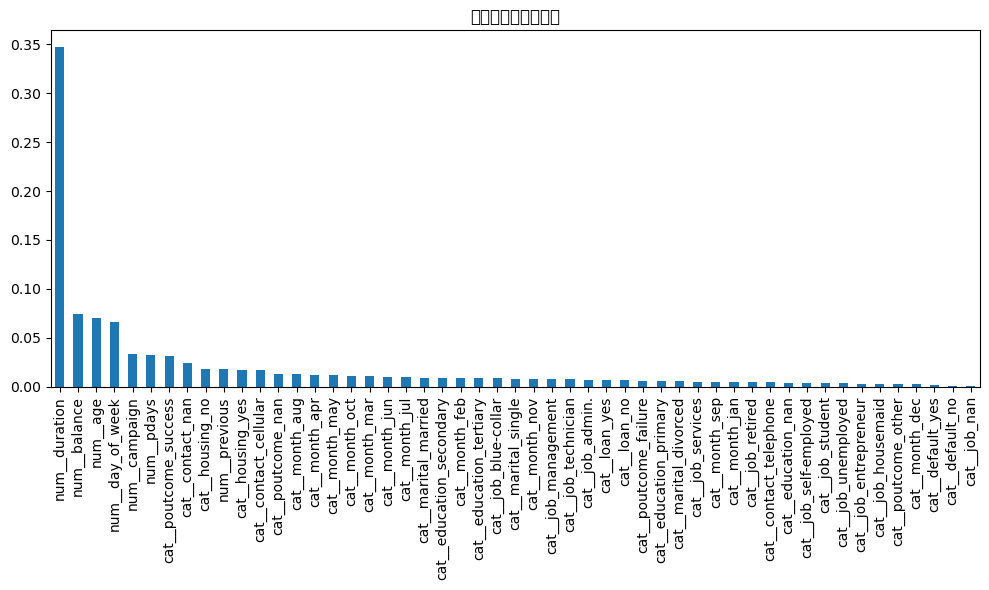

NameError: name 'xgb_model' is not defined

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 获取特征名称
feature_names = preprocessor.get_feature_names_out()

# 随机森林特征重要性
importances_rf = rf_model.feature_importances_
feature_importance_rf = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_rf.plot.bar()
plt.title('随机森林特征重要性')
plt.tight_layout()
plt.show()

# XGBoost 特征重要性
importances_xgb = xgb_model.feature_importances_
feature_importance_xgb = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_xgb.plot.bar()
plt.title('XGBoost 特征重要性')
plt.tight_layout()
plt.show()

方法 3.2：逻辑回归（作为基准）

改进建议：

逻辑回归是一个简单、可解释的模型，适合作为基准。
使用 class_weight='balanced' 处理不平衡数据。
虽然性能可能不如随机森林或 XGBoost，但逻辑回归的系数可以提供特征重要性的直观解释。

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 创建并训练逻辑回归模型
lr_model = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)
lr_model.fit(X_train, y_train)

# 预测
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# 评估
print("逻辑回归分类报告：")
print(classification_report(y_test, y_pred_lr))
print("逻辑回归 AUC-ROC 分数：", roc_auc_score(y_test, y_pred_proba_lr))

逻辑回归分类报告：
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043

逻辑回归 AUC-ROC 分数： 0.9079160713672728


逻辑回归的召回率竟然是最高的？？？？（很奇怪

4. 特征重要性分析
改进建议：

通过分析特征重要性，识别对预测最重要的特征，可能需要进一步特征工程（如创建交互特征或删除低重要性特征）。
随机森林和 XGBoost 都可以提供特征重要性分数，逻辑回归则通过系数大小反映重要性。
如果某些特征（如 duration）重要性过高但在实际应用中不可用，需重新训练模型排除该特征

/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_46294/3304770498.py:13: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipyker

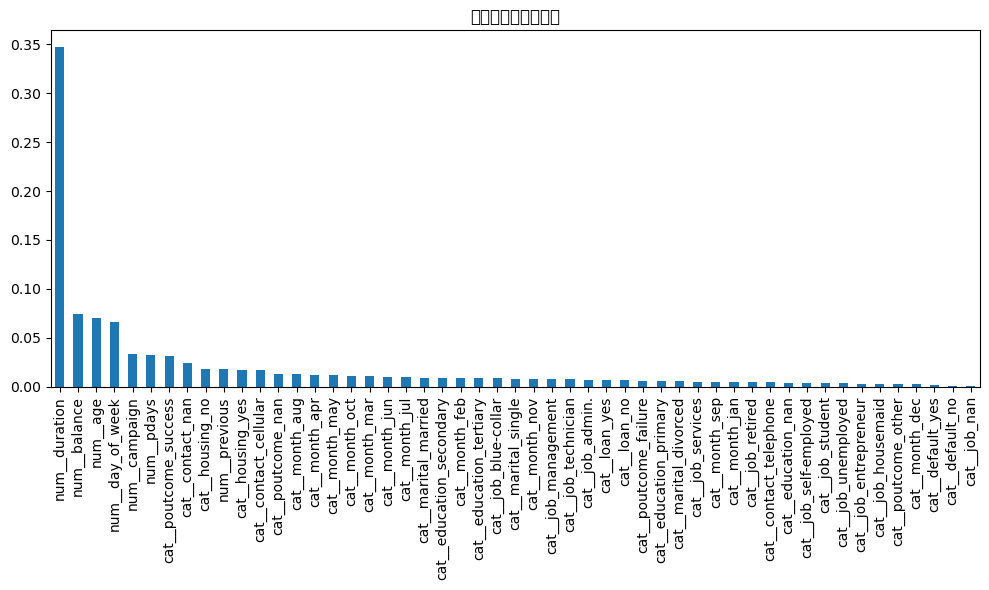

NameError: name 'xgb_model' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 获取特征名称
feature_names = preprocessor.get_feature_names_out()

# 随机森林特征重要性
importances_rf = rf_model.feature_importances_
feature_importance_rf = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_rf.plot.bar()
plt.title('随机森林特征重要性')
plt.tight_layout()
plt.show()

# XGBoost 特征重要性
importances_xgb = xgb_model.feature_importances_
feature_importance_xgb = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_xgb.plot.bar()
plt.title('XGBoost 特征重要性')
plt.tight_layout()
plt.show()